In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 16

In [2]:
class Particula:
  def __init__(self, x, y, vx, vy, massa):
    self.x     = [x]
    self.y     = [y]
    self.vx    = [vx]
    self.vy    = [vy]
    self.massa = massa

  def newton(self, fx, fy, dt):
    if self.y[-1] >= 0:
      # calculate acceleration
      ax = fx / self.massa
      ay = fy / self.massa
      # update velocity
      self.vx.append(self.vx[-1] + ax * dt)
      self.vy.append(self.vy[-1] + ay * dt)
      # update position
      self.x.append(self.x[-1] + self.vx[-1] * dt + 0.5 * ax * dt**2)
      self.y.append(self.y[-1] + self.vy[-1] * dt + 0.5 * ax * dt**2)

In [3]:
# create a particle
p1 = Particula(0,   0,    # (x0, y0) = (0, 0)
              10*np.cos(np.deg2rad(45)), 10*np.sin(np.deg2rad(45)),   # (vx, vy) = (0, 0)
              1)         # m = 1kg

p2 = Particula(0,   0,    # (x0, y0) = (0, 0)
               10*np.cos(np.deg2rad(65)), 10*np.sin(np.deg2rad(65)),  # (vx, vy) = (0, 0)
               1)         # m = 1kg

p3 = Particula(0,   0,    # (x0, y0) = (0, 0)
               10*np.cos(np.deg2rad(25)), 10*np.sin(np.deg2rad(25)),  # (vx, vy) = (0, 0)
               1)         # m = 1kg

# parameters
dt = 0.01    # time step
tempo = 100   # total time for the simulation

# evaluate data
for i in range(int(tempo/dt)):
  for p in [p1, p2, p3]:
    p.newton(0, -9.8, dt)

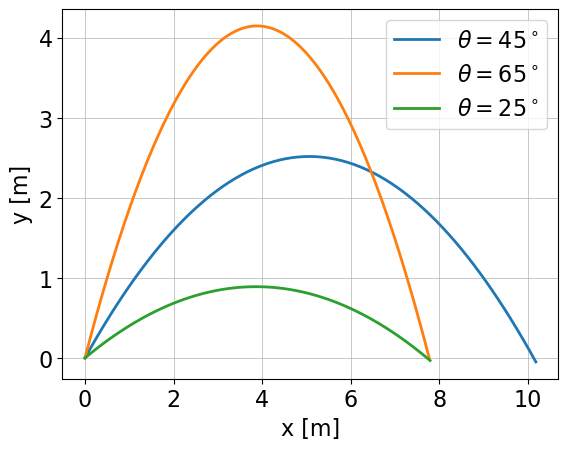

In [4]:
# plot
for theta, p in zip(["45", "65", "25"],
                    [ p1 ,  p2 ,  p3]):
  plt.plot(p.x, p.y, lw=2, label=rf'$\theta = {theta}^\circ$')

plt.legend()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.grid(lw=0.5)
plt.show()